In [1]:
import numpy as np
from numpy import log2
import matplotlib.pyplot as plt

import pandas as pd

#sudo pip install humanfriendly
import humanfriendly as hf #Convert values into human friendly formats

# CPU

In [2]:
CPU_data = [("Kay SuperComputer", 64, 13340, 3.7, 1000)]
columns = ['Name','IOPS', 'CPU Cores', 'CPU Clock (GHz)', 'RAM (Gb)']
ComputeSystems = pd.DataFrame(CPU_data,columns=columns)

ComputeSystems=ComputeSystems.append(pd.DataFrame([("Server", 64, 96, 3, 128)],columns=columns))
ComputeSystems=ComputeSystems.append(pd.DataFrame([("Desktop", 32, 8, 4, 8)],columns=columns))
ComputeSystems=ComputeSystems.append(pd.DataFrame([("SBC", 8, 4, 1.4, 0.5)],columns=columns))
ComputeSystems=ComputeSystems.append(pd.DataFrame([("MicroProcessor", 1, 1, 0.4, 5*(10**-4))],columns=columns))

ComputeSystems["GFLOPS"]=ComputeSystems['IOPS']*ComputeSystems['CPU Cores']*ComputeSystems['CPU Clock (GHz)']
ComputeSystems["FLOPS"]=ComputeSystems["GFLOPS"]/(10**-9)
ComputeSystems["TFLOPS"]=ComputeSystems["GFLOPS"]/(10**3)
ComputeSystems["RAM"]=ComputeSystems["RAM (Gb)"]/(10**-9)
ComputeSystems["CPU Clock"]=ComputeSystems["CPU Clock (GHz)"]/(10**-9)

Ram_Sizes = [("All of Google's Servers, 15Eb", 8*15*(10**18)), ("Kay SuperComputer, 1.5Tb", 8*1.5*(10**12)), ("Server, 128Gb", 8*128*(10**9)), ("Desktop PC, 8Gb", 8*8*(10**9)), ("SBC, 0.5Gb", 8*0.5*(10**9)), ("Microcontroller, 500Kb", 8*500*(10**3)), ]

print(ComputeSystems)

                Name  IOPS  CPU Cores  CPU Clock (GHz)   RAM (Gb)     GFLOPS  \
0  Kay SuperComputer    64      13340              3.7  1000.0000  3158912.0   
0             Server    64         96              3.0   128.0000    18432.0   
0            Desktop    32          8              4.0     8.0000     1024.0   
0                SBC     8          4              1.4     0.5000       44.8   
0     MicroProcessor     1          1              0.4     0.0005        0.4   

          FLOPS     TFLOPS           RAM     CPU Clock  
0  3.158912e+15  3158.9120  1.000000e+12  3.700000e+09  
0  1.843200e+13    18.4320  1.280000e+11  3.000000e+09  
0  1.024000e+12     1.0240  8.000000e+09  4.000000e+09  
0  4.480000e+10     0.0448  5.000000e+08  1.400000e+09  
0  4.000000e+08     0.0004  5.000000e+05  4.000000e+08  


# Computational Expense

In [3]:
#((2**b)*N)

def CrossCorrDirect_Ops(N,bits=8, SS=False, MultAdd=False):
    if MultAdd: MA = np.ceil(bits**1.465)
    else: MA = 1
    if SS: SS = 2**bits
    else: SS = 1
        
    return  MA* ((SS*N) **4) 

def CrossCorrFreq_Ops(N,bits=8, SS=False, MultAdd=False):
    if MultAdd: MA = np.ceil(bits**1.465)
    else: MA = 1
    if SS: SS = 2**bits
    else: SS = 1
        
    return MA * (4*( (SS*3*N)**2 ) * (2*log2(SS*3*N) + 1))

def ProposedMethod_Ops(N,bits=8, MultAdd=False):
    if MultAdd: MA = np.ceil(log2(bits))
    else: MA = 1
    return MA*(3*(N**2)+2*N)

def compare_algs(px_x, px_y, bits = 8, SS = False, SILENT=False):
    N = np.sqrt(px_x*px_y)   
    speed_up = np.floor(CrossCorrFreq_Ops(N,bits,SS)/ProposedMethod_Ops(N,bits))
    if not SILENT:
        print("{:.0f} {:.0f} is equivalent to {:.0f}^2, {:.2e}x speedup ".format(px_x, px_y, N, speed_up))
    return speed_up

Televisions are of the following resolutions:

    Enhanced-definition television (EDTV):
        480p (720 × 480)
    High-definition television (HDTV):
        720p (1280 × 720)
        1080p (1920 × 1080)
    Ultra-high-definition television (UHDTV):
        4K UHD (3840 × 2160)
        8K UHD (7680 × 4320)

In [4]:
Resolutions = np.array([(320,240),(640,480), (800,600), (1280, 720), (1600,900), (1920,1080), (3840,2160), (7680,4320)])
#Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
print("Supra Pixel")


Speedup = [compare_algs(px,py) for px,py in Resolutions]

print("\nSub Pixel")
Speedup = [compare_algs(px,py,SS=True) for px,py in Resolutions]

Supra Pixel
320 240 is equivalent to 277^2, 2.44e+02x speedup 
640 480 is equivalent to 554^2, 2.68e+02x speedup 
800 600 is equivalent to 693^2, 2.76e+02x speedup 
1280 720 is equivalent to 960^2, 2.87e+02x speedup 
1600 900 is equivalent to 1200^2, 2.95e+02x speedup 
1920 1080 is equivalent to 1440^2, 3.01e+02x speedup 
3840 2160 is equivalent to 2880^2, 3.25e+02x speedup 
7680 4320 is equivalent to 5760^2, 3.49e+02x speedup 

Sub Pixel
320 240 is equivalent to 277^2, 2.86e+07x speedup 
640 480 is equivalent to 554^2, 3.02e+07x speedup 
800 600 is equivalent to 693^2, 3.07e+07x speedup 
1280 720 is equivalent to 960^2, 3.14e+07x speedup 
1600 900 is equivalent to 1200^2, 3.19e+07x speedup 
1920 1080 is equivalent to 1440^2, 3.23e+07x speedup 
3840 2160 is equivalent to 2880^2, 3.39e+07x speedup 
7680 4320 is equivalent to 5760^2, 3.55e+07x speedup 


# Variation of Computational Expense and Image Size

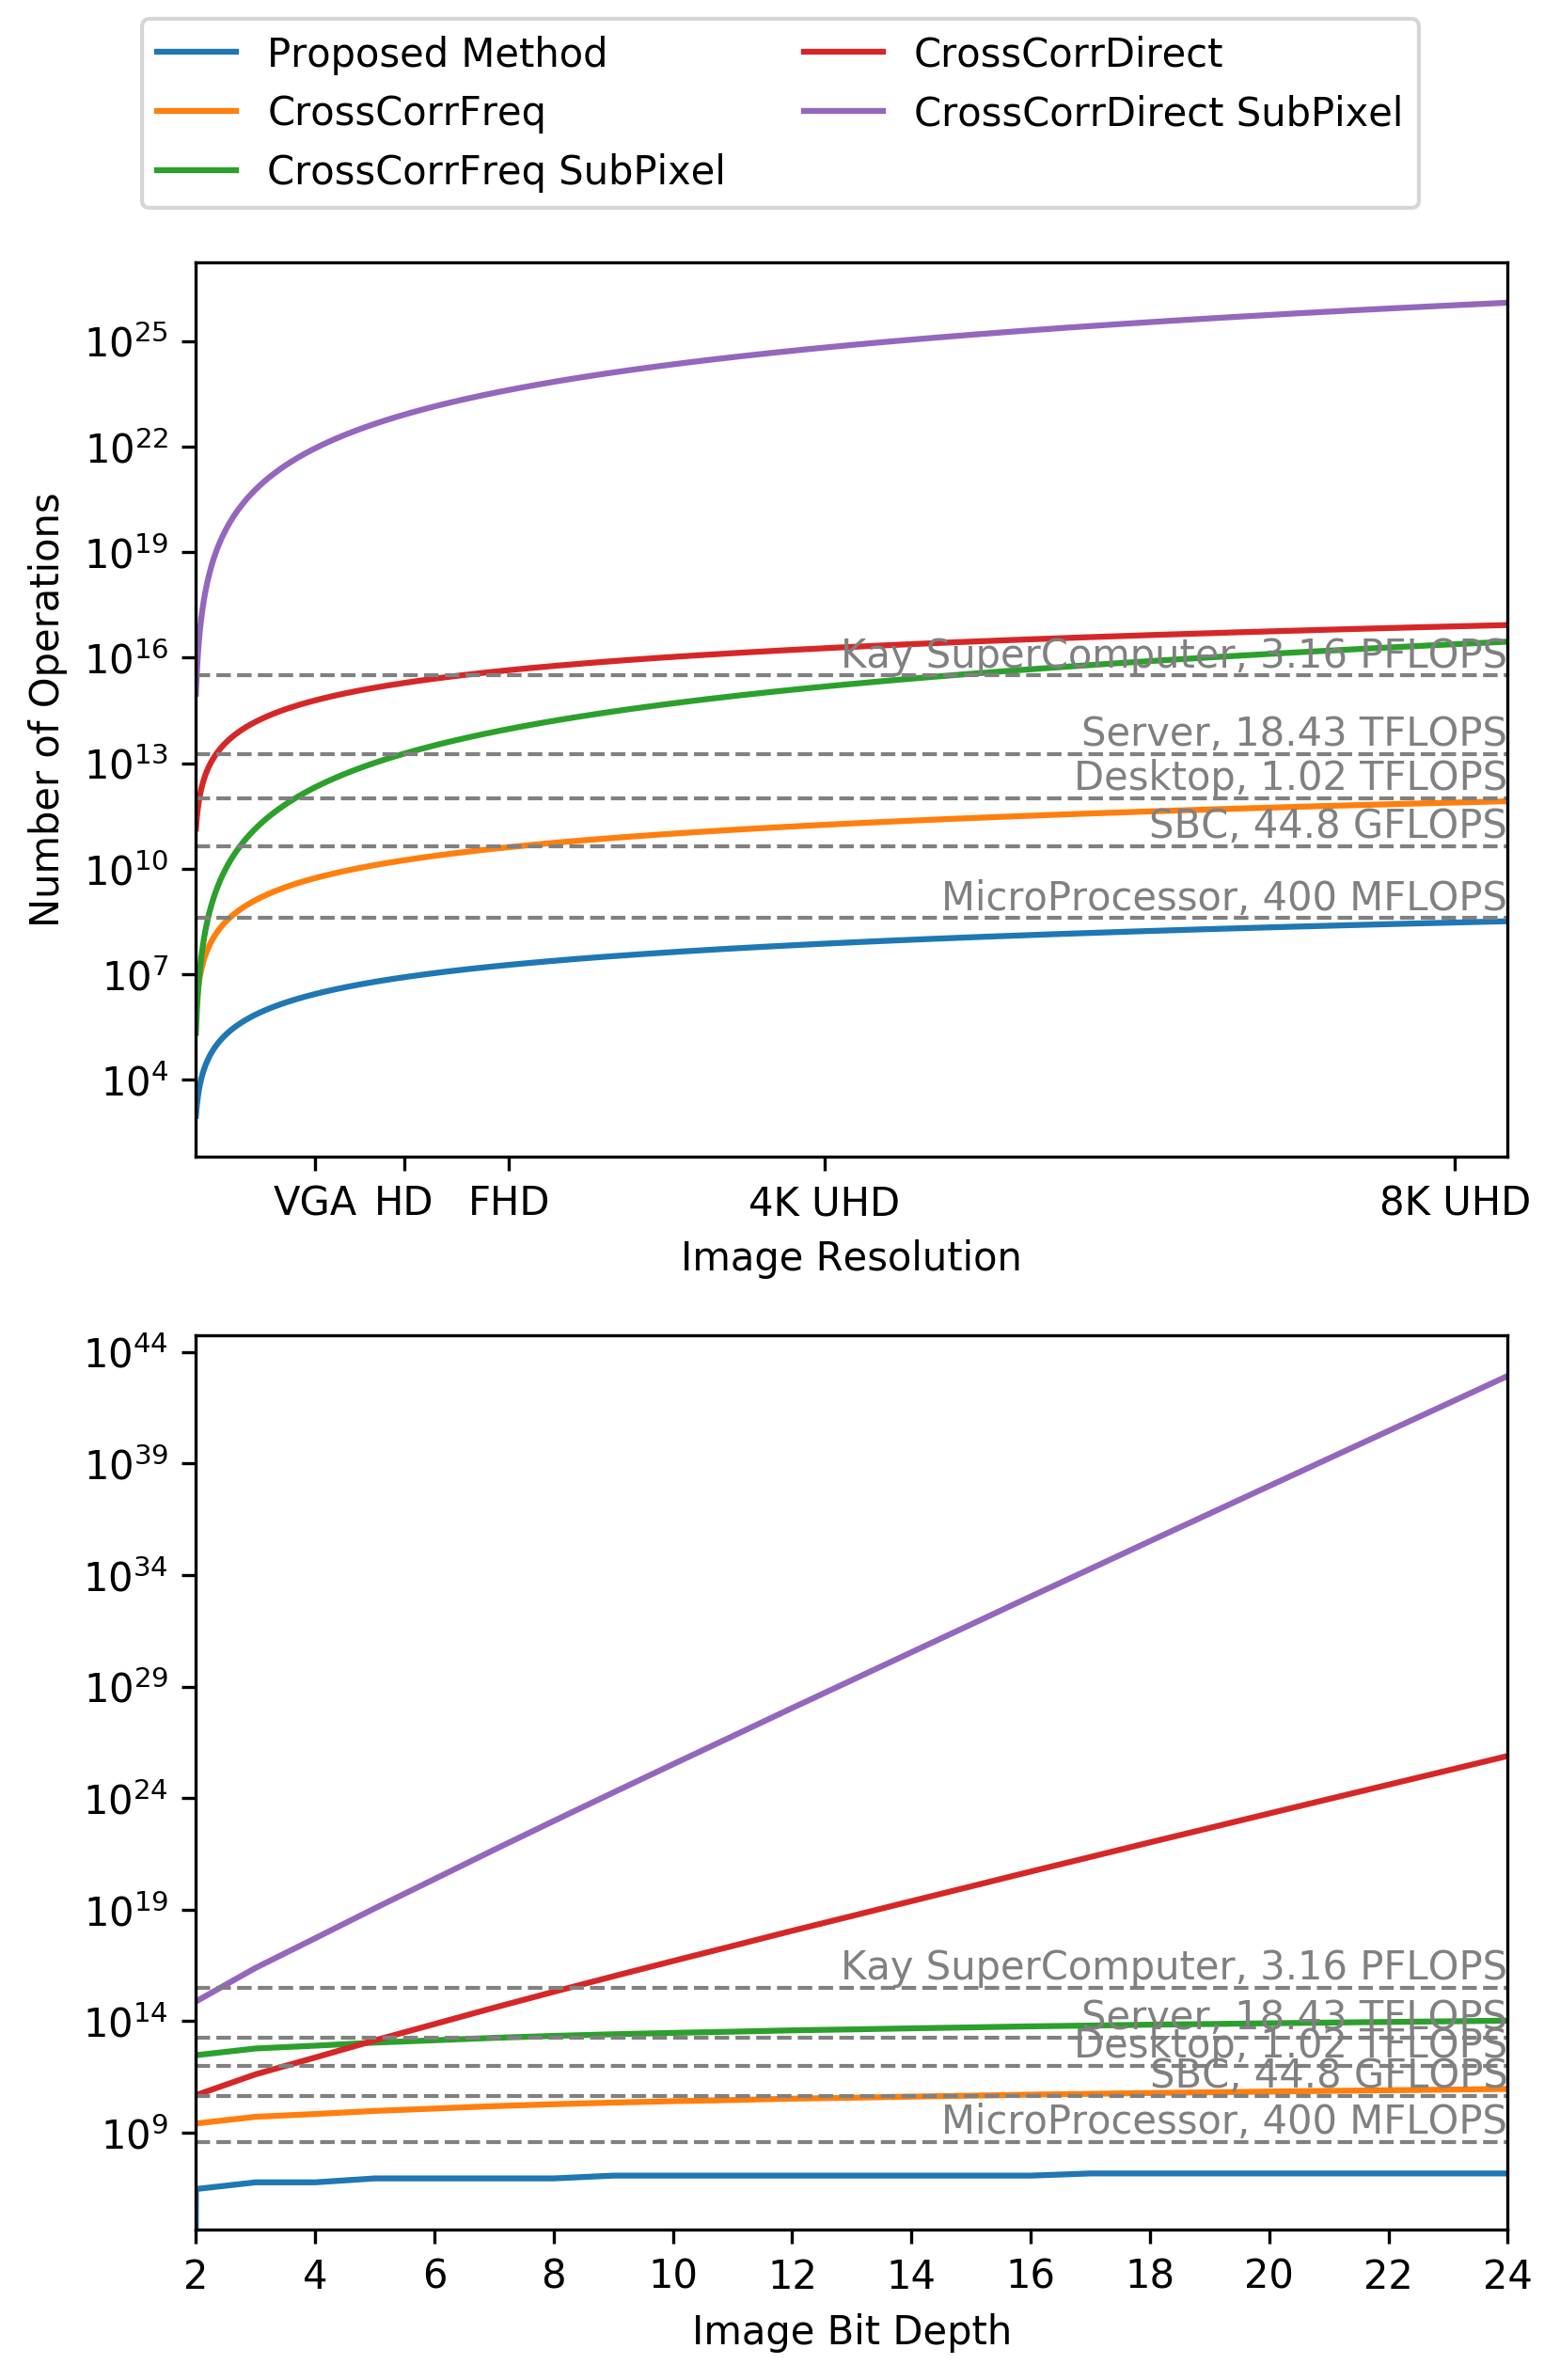

In [30]:
fout = "Results/ComputationalExpense/"

#------------------------------------------------------------------------------------------------------------
# Graph 1
#------------------------------------------------------------------------------------------------------------

N_min = 10
N_max = 6000
N_range = [N for N in range(N_min,N_max)]

bits = 8
MultAdd = True

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits, MultAdd=MultAdd)           for N in N_range]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]

#PLOT

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,9), dpi=300)

l1 = ax1.plot(N_range, ProposedMethod)
l2 = ax1.plot(N_range, CrossCorrFreq)
l3 = ax1.plot(N_range, CrossCorrDirect)
l4 = ax1.plot(N_range, CrossCorrFreq_SS)
l5 = ax1.plot(N_range, CrossCorrDirect_SS)

## AXES

ax1.set_yscale('log')
ax1.set_xlim((N_min, N_max))
ax1.set_ylabel('Number of Operations')
ax1.set_xlabel('Image Resolution')

## TICKS

Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
N_sq = [np.sqrt(px*py) for px,py in Resolutions]
x_val = N_sq
ticks = ["VGA", "HD", "FHD", "4K UHD", "8K UHD"]
ax1.set_xticks(x_val)
ax1.set_xticklabels(ticks)

## ANNOTATION

for index, system in ComputeSystems.iterrows():
    ax1.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    ax1.text(N_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  


#------------------------------------------------------------------------------------------------------------
# Graph 2
#------------------------------------------------------------------------------------------------------------

N = 1000

bits_min = 1
bits_max = 25
bits_step = 1
Bit_Depth = [b for b in range(bits_min,bits_max)]

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits,           MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]

#PLOT

ax2.plot(Bit_Depth, ProposedMethod)
ax2.plot(Bit_Depth, CrossCorrFreq)
ax2.plot(Bit_Depth, CrossCorrDirect)
ax2.plot(Bit_Depth, CrossCorrFreq_SS)
ax2.plot(Bit_Depth, CrossCorrDirect_SS)

## AXES
    
ax2.set_yscale('log')
ax2.set_xlim((bits_min+1, bits_max-1))
ax2.set_xlabel('Image Bit Depth')

## TICKS

ticks = range(2, bits_max, 2)
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks)

## ANNOTATIONS

for index, system in ComputeSystems.iterrows():
    ax2.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    ax2.text(bits_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  

## FINAL DETAILS

line_labels = ('Proposed Method', 'CrossCorrFreq', 'CrossCorrFreq SubPixel', 'CrossCorrDirect', 'CrossCorrDirect SubPixel')

# Create the legend
fig.legend([l1, l2, l3, l4, l5],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper center",   # Position of legend
           ncol=2)
#plt.tight_layout()
plt.subplots_adjust(top=0.9) #give some extra room for the legend
plt.savefig(fout+"CompExp_ALL_MA")
plt.show()

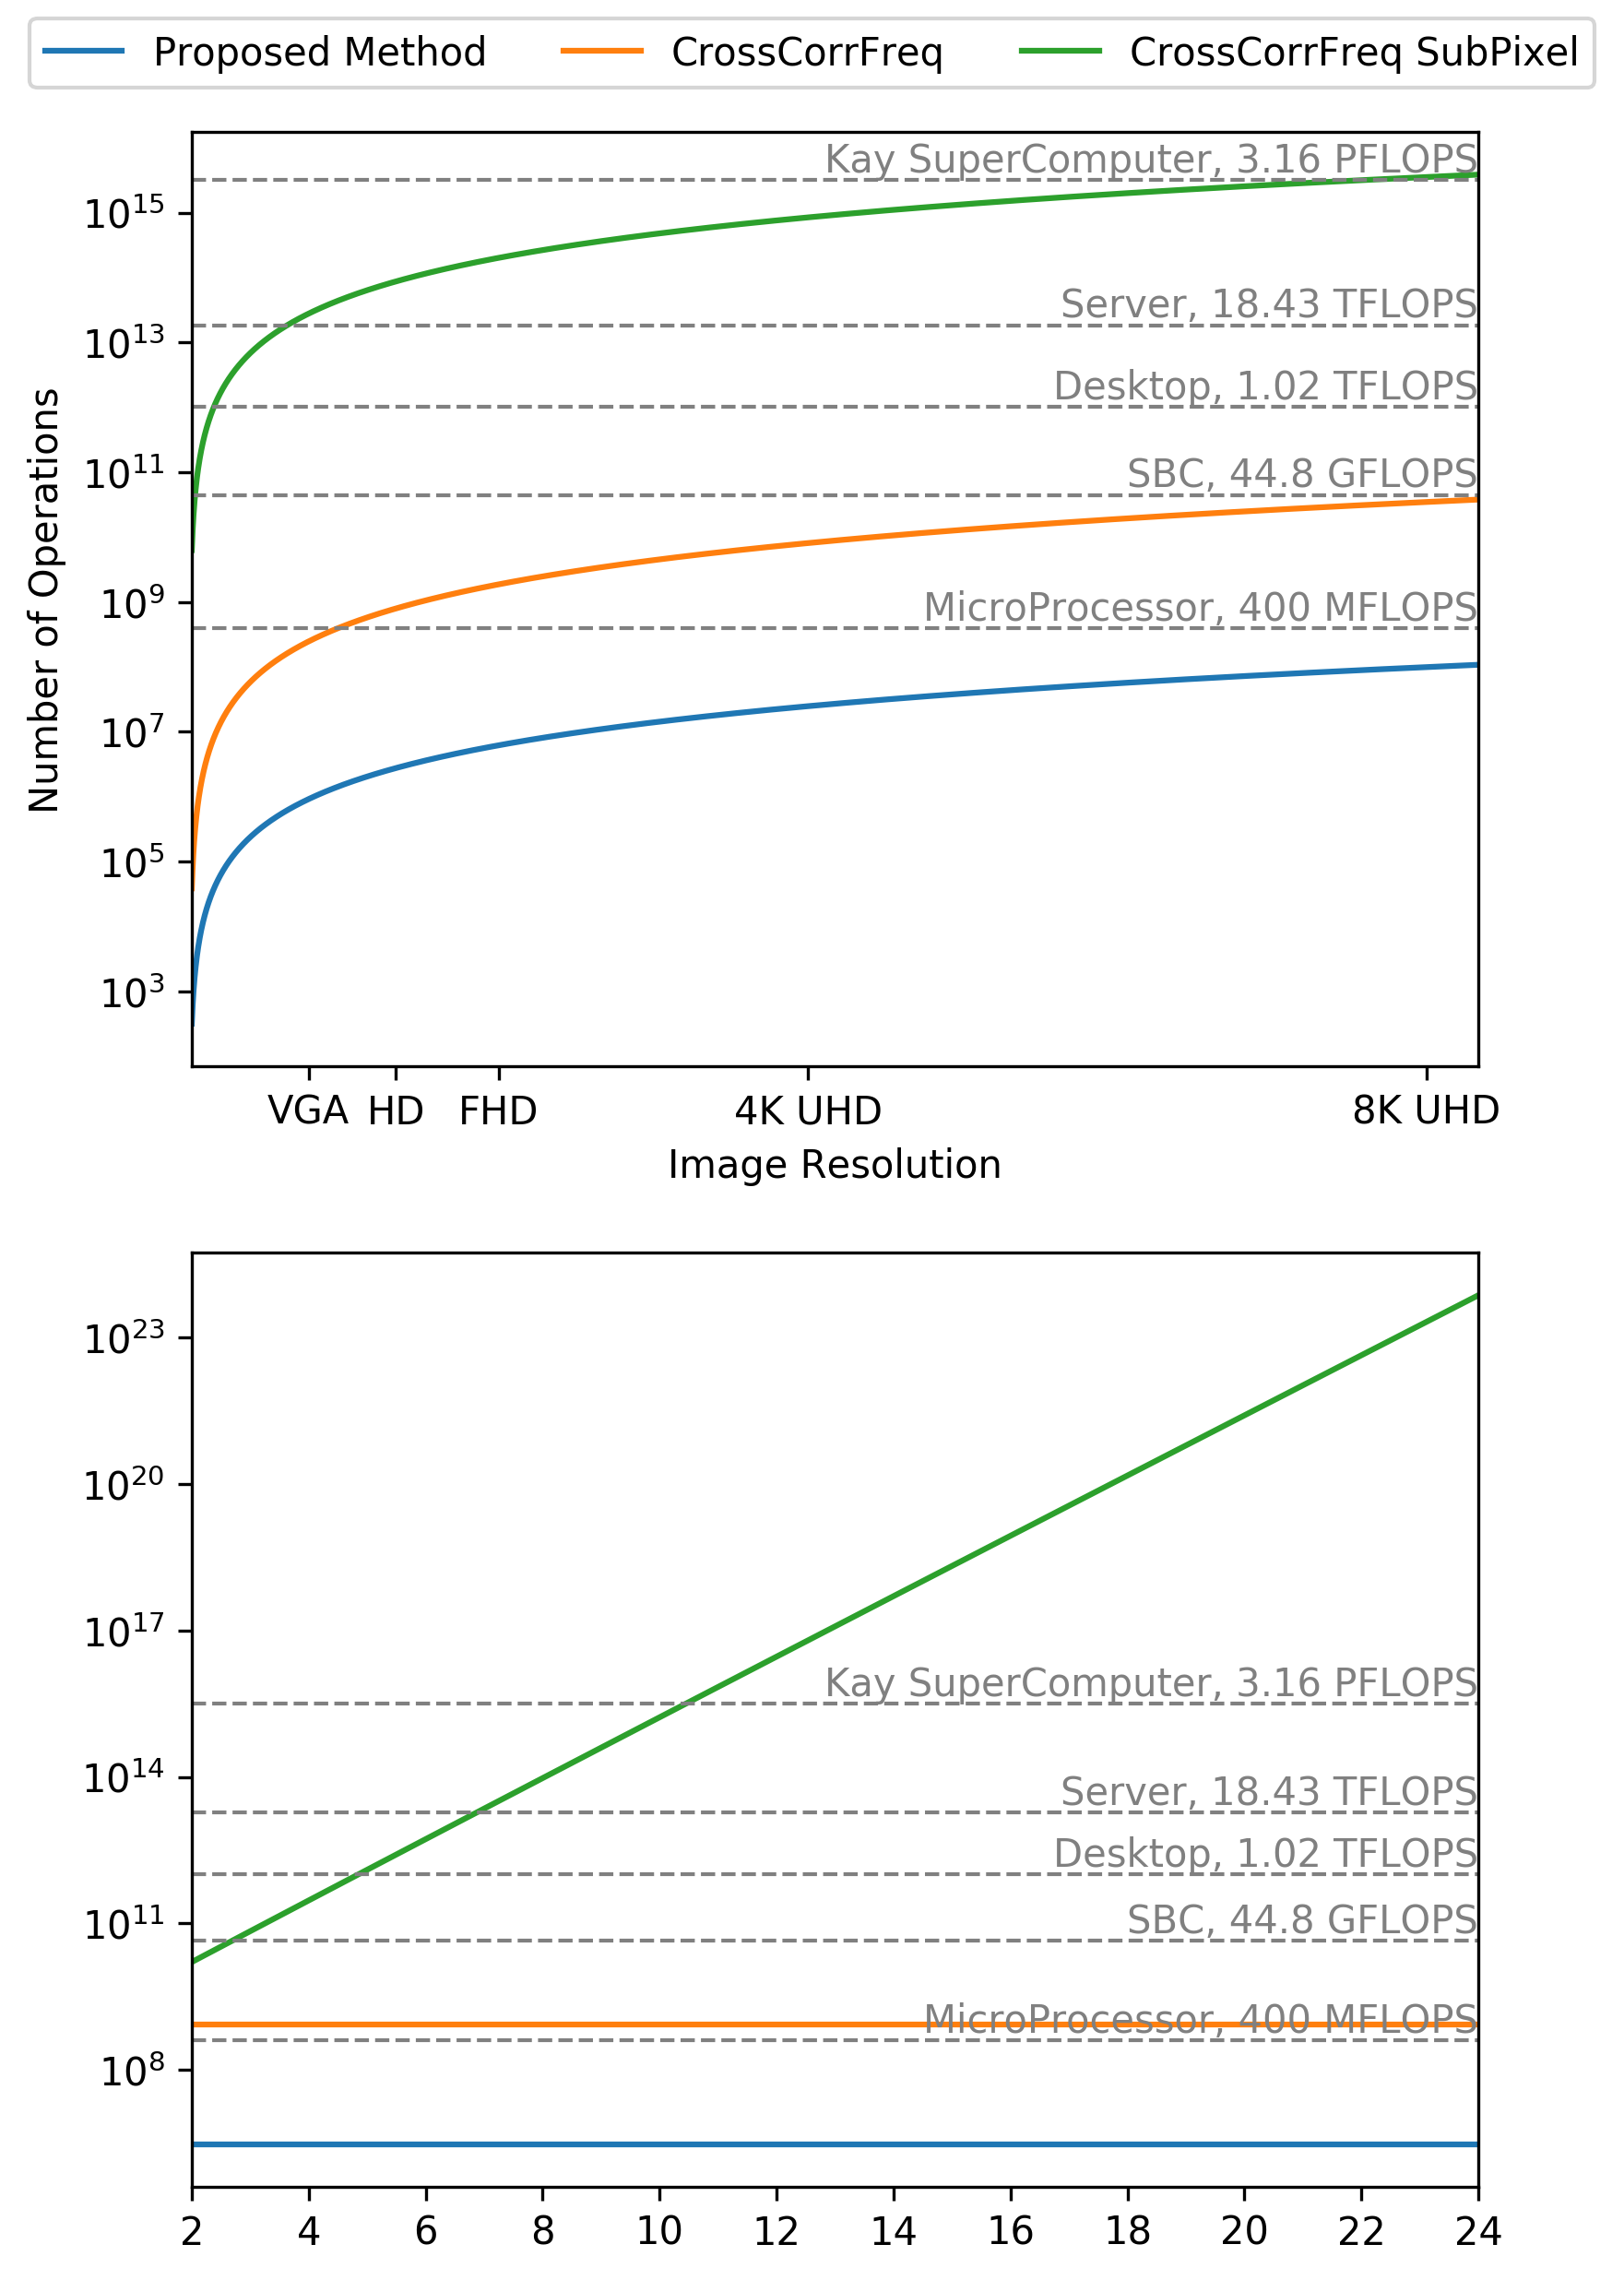

In [32]:
fout = "Results/ComputationalExpense/"

#------------------------------------------------------------------------------------------------------------
# Graph 1
#------------------------------------------------------------------------------------------------------------

N_min = 10
N_max = 6000
N_range = [N for N in range(N_min,N_max)]

bits = 8
MultAdd = False

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits, MultAdd=MultAdd)           for N in N_range]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]

#PLOT

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,9), dpi=300)

l1 = ax1.plot(N_range, ProposedMethod)
l2 = ax1.plot(N_range, CrossCorrFreq)
#l3 = ax1.plot(N_range, CrossCorrDirect)
l4 = ax1.plot(N_range, CrossCorrFreq_SS)
#l5 = ax1.plot(N_range, CrossCorrDirect_SS)

## AXES

ax1.set_yscale('log')
ax1.set_xlim((N_min, N_max))
ax1.set_ylabel('Number of Operations')
ax1.set_xlabel('Image Resolution')

## TICKS

Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
N_sq = [np.sqrt(px*py) for px,py in Resolutions]
x_val = N_sq
ticks = ["VGA", "HD", "FHD", "4K UHD", "8K UHD"]
ax1.set_xticks(x_val)
ax1.set_xticklabels(ticks)

## ANNOTATION

for index, system in ComputeSystems.iterrows():
    ax1.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    ax1.text(N_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  


#------------------------------------------------------------------------------------------------------------
# Graph 2
#------------------------------------------------------------------------------------------------------------

N = 1000

bits_min = 1
bits_max = 25
bits_step = 1
Bit_Depth = [b for b in range(bits_min,bits_max)]

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits,           MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]

#PLOT

ax2.plot(Bit_Depth, ProposedMethod)
ax2.plot(Bit_Depth, CrossCorrFreq)
#ax2.plot(Bit_Depth, CrossCorrDirect)
ax2.plot(Bit_Depth, CrossCorrFreq_SS)
#ax2.plot(Bit_Depth, CrossCorrDirect_SS)

## AXES
    
ax2.set_yscale('log')
ax2.set_xlim((bits_min+1, bits_max-1))
ax1.set_xlabel('Image Resolution')

## TICKS

ticks = range(2, bits_max, 2)
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks)

## ANNOTATIONS

for index, system in ComputeSystems.iterrows():
    ax2.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    ax2.text(bits_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  

## FINAL DETAILS

line_labels = ('Proposed Method', 'CrossCorrFreq', 'CrossCorrFreq SubPixel')

# Create the legend
fig.legend([l1, l2, l3, l4, l5],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper center",   # Position of legend
           ncol=3)
#plt.tight_layout()
plt.subplots_adjust(top=0.95) #give some extra room for the legend
plt.savefig(fout+"CompExp")
plt.show()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


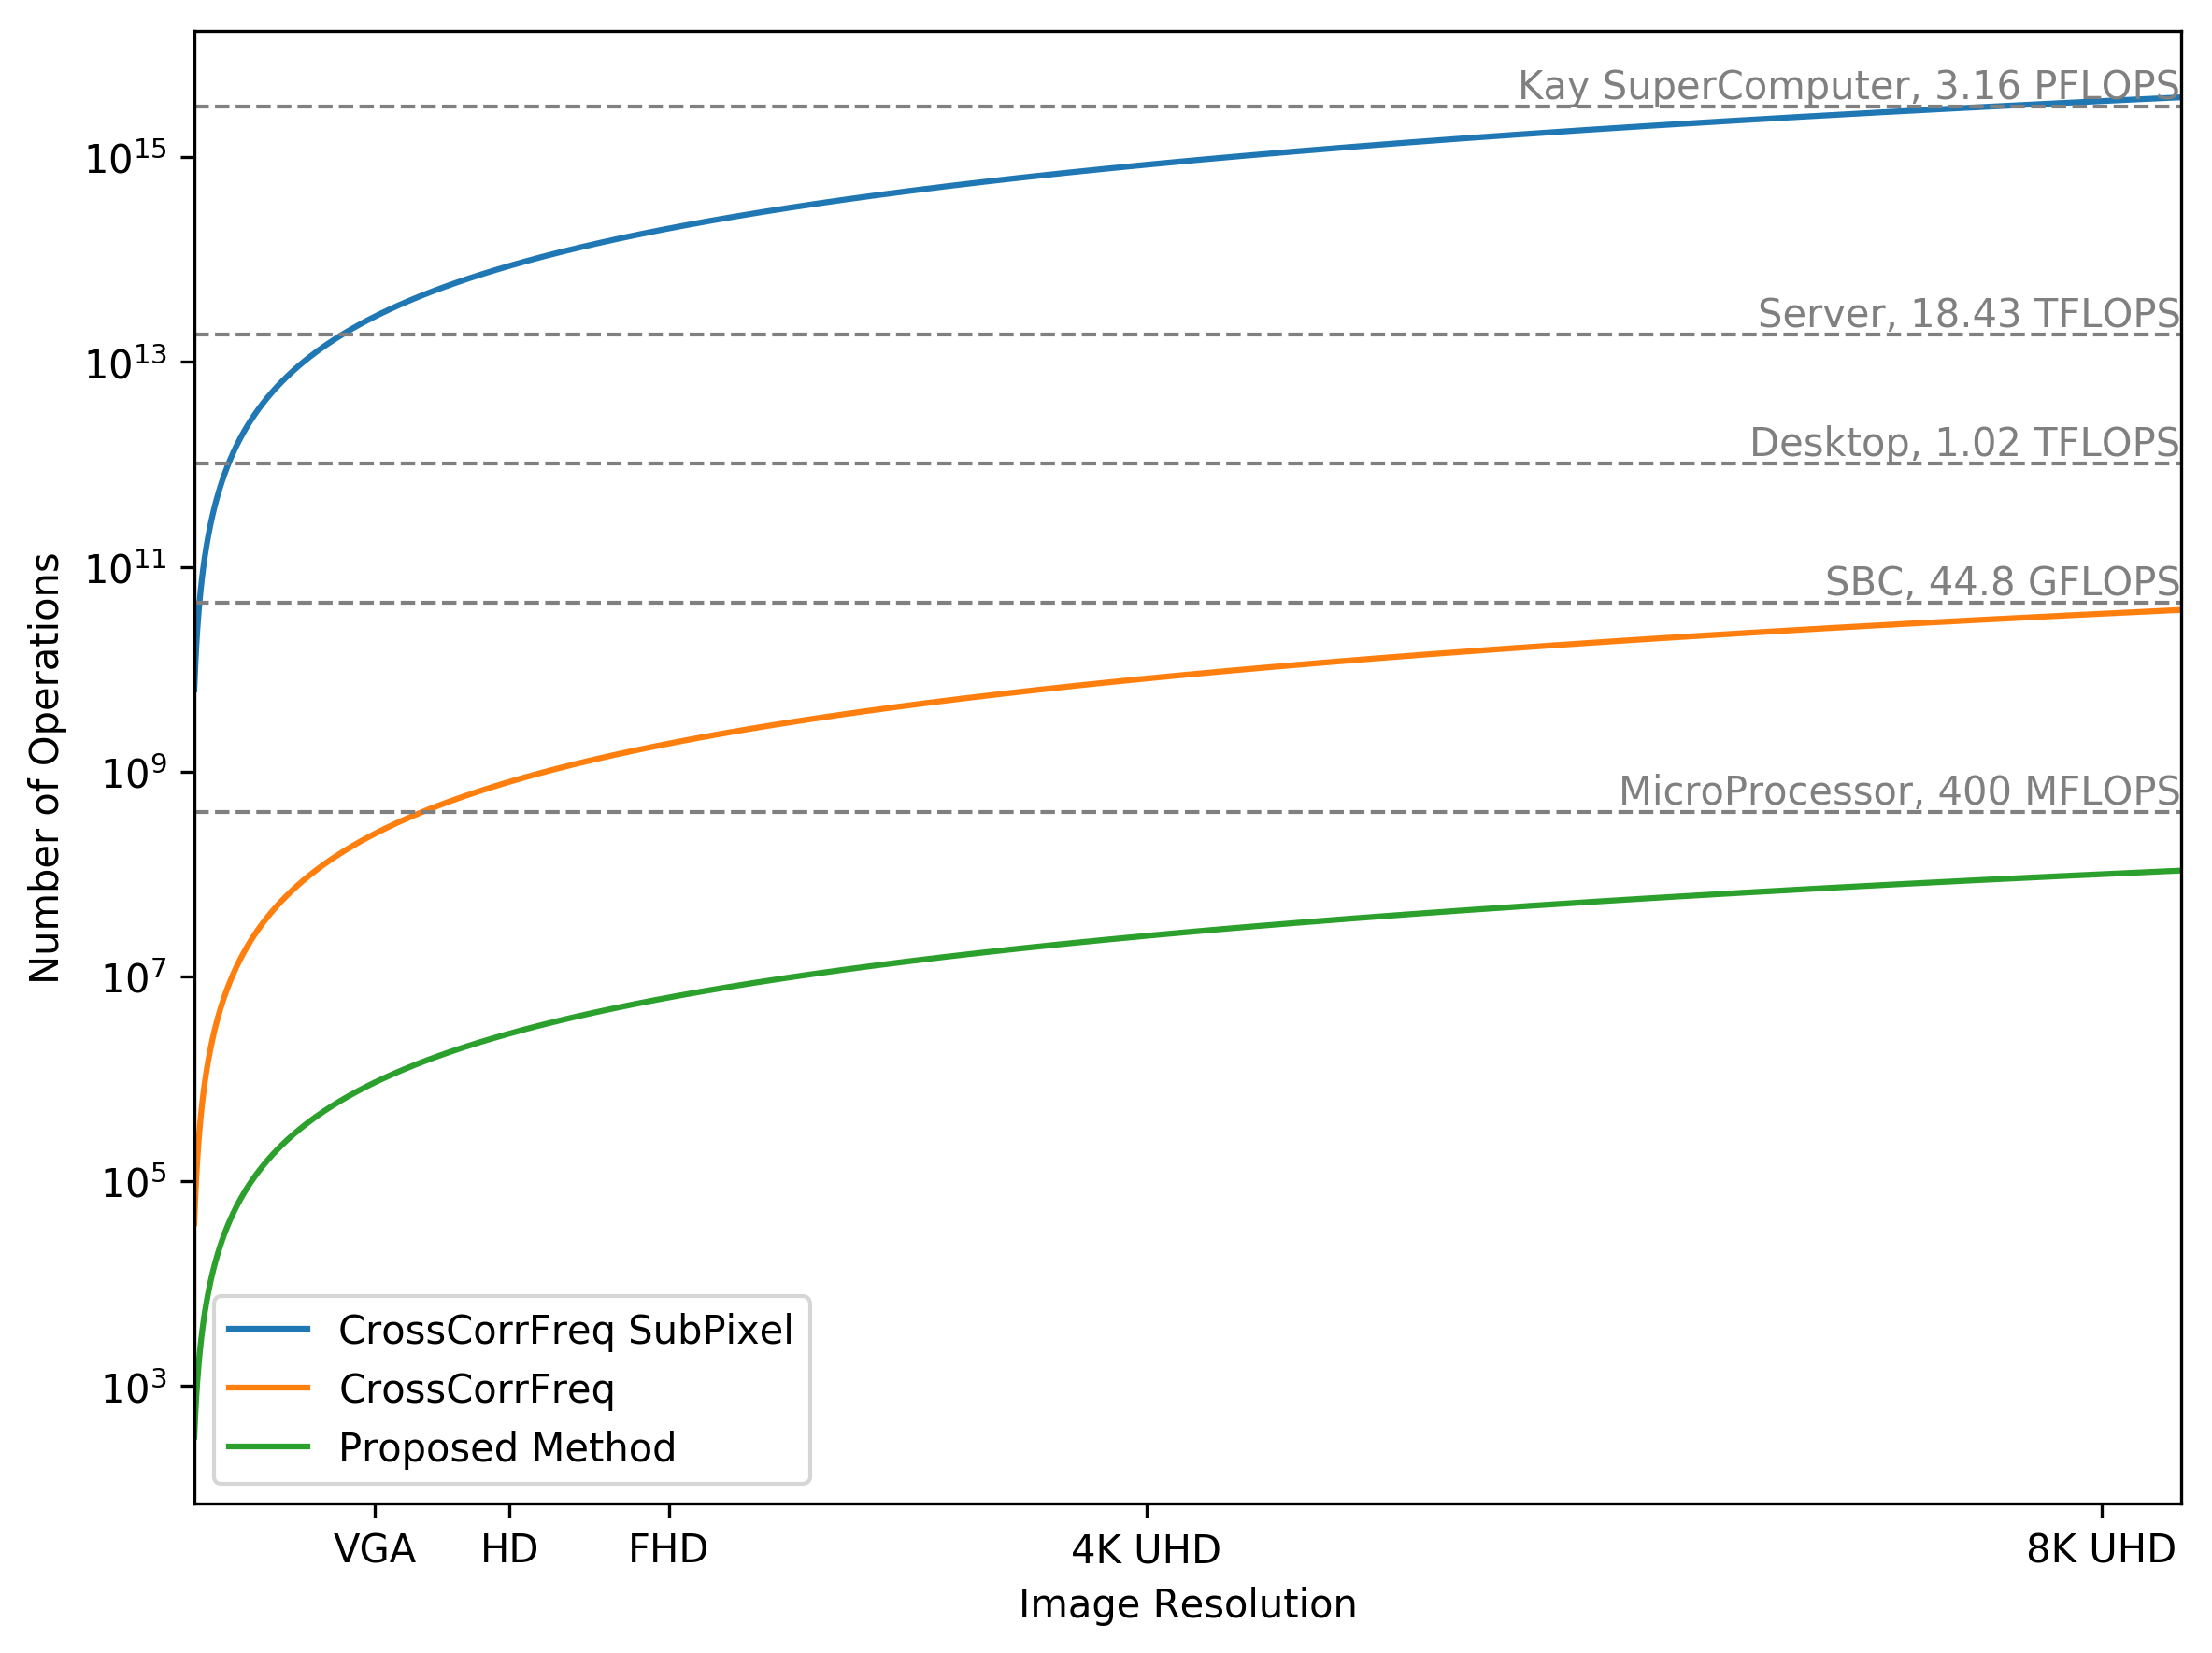

In [6]:
N_min = 10
N_max = 6000
N_range = [N for N in range(N_min,N_max)]

bits = 8
MultAdd = False

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits, MultAdd=MultAdd)           for N in N_range]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for N in N_range]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for N in N_range]

fout = "Results/ComputationalExpense/"
fig = plt.figure(figsize=(8,6), dpi=300)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = fig.add_subplot(111)

ax.plot(N_range, CrossCorrFreq_SS, label = "CrossCorrFreq SubPixel")
ax.plot(N_range, CrossCorrFreq, label = "CrossCorrFreq")
ax.plot(N_range, ProposedMethod, label = "Proposed Method")
#ax.plot(N_range, CrossCorrDirect, label = "CrossCorrDirect")
#ax.plot(N_range, CrossCorrDirect_SS, label = "CrossCorrDirect w/SS")

Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
N_sq = [np.sqrt(px*py) for px,py in Resolutions]
x_val = N_sq
tick = ["VGA", "HD", "FHD", "4K UHD", "8K UHD"]
plt.xticks(x_val, tick)

for index, system in ComputeSystems.iterrows():
    plt.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    plt.text(N_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  

ax.set_yscale('log')
plt.xlim((N_min, N_max))
plt.ylabel('Number of Operations')
plt.xlabel('Image Resolution')
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(top=0.92) #give some extra room for the title, top of graph is at 92% of height of fig
#plt.title("Computational Expense of Motion Estimation, {}bit grayscale".format(bits), fontsize = 12)

plt.savefig(fout+"CompExp_vs_ImSize_cutdown_b{}_MA{}".format(bits, MultAdd))
#plt.show()

# Variation of Computational Expense and Image Bit Depth

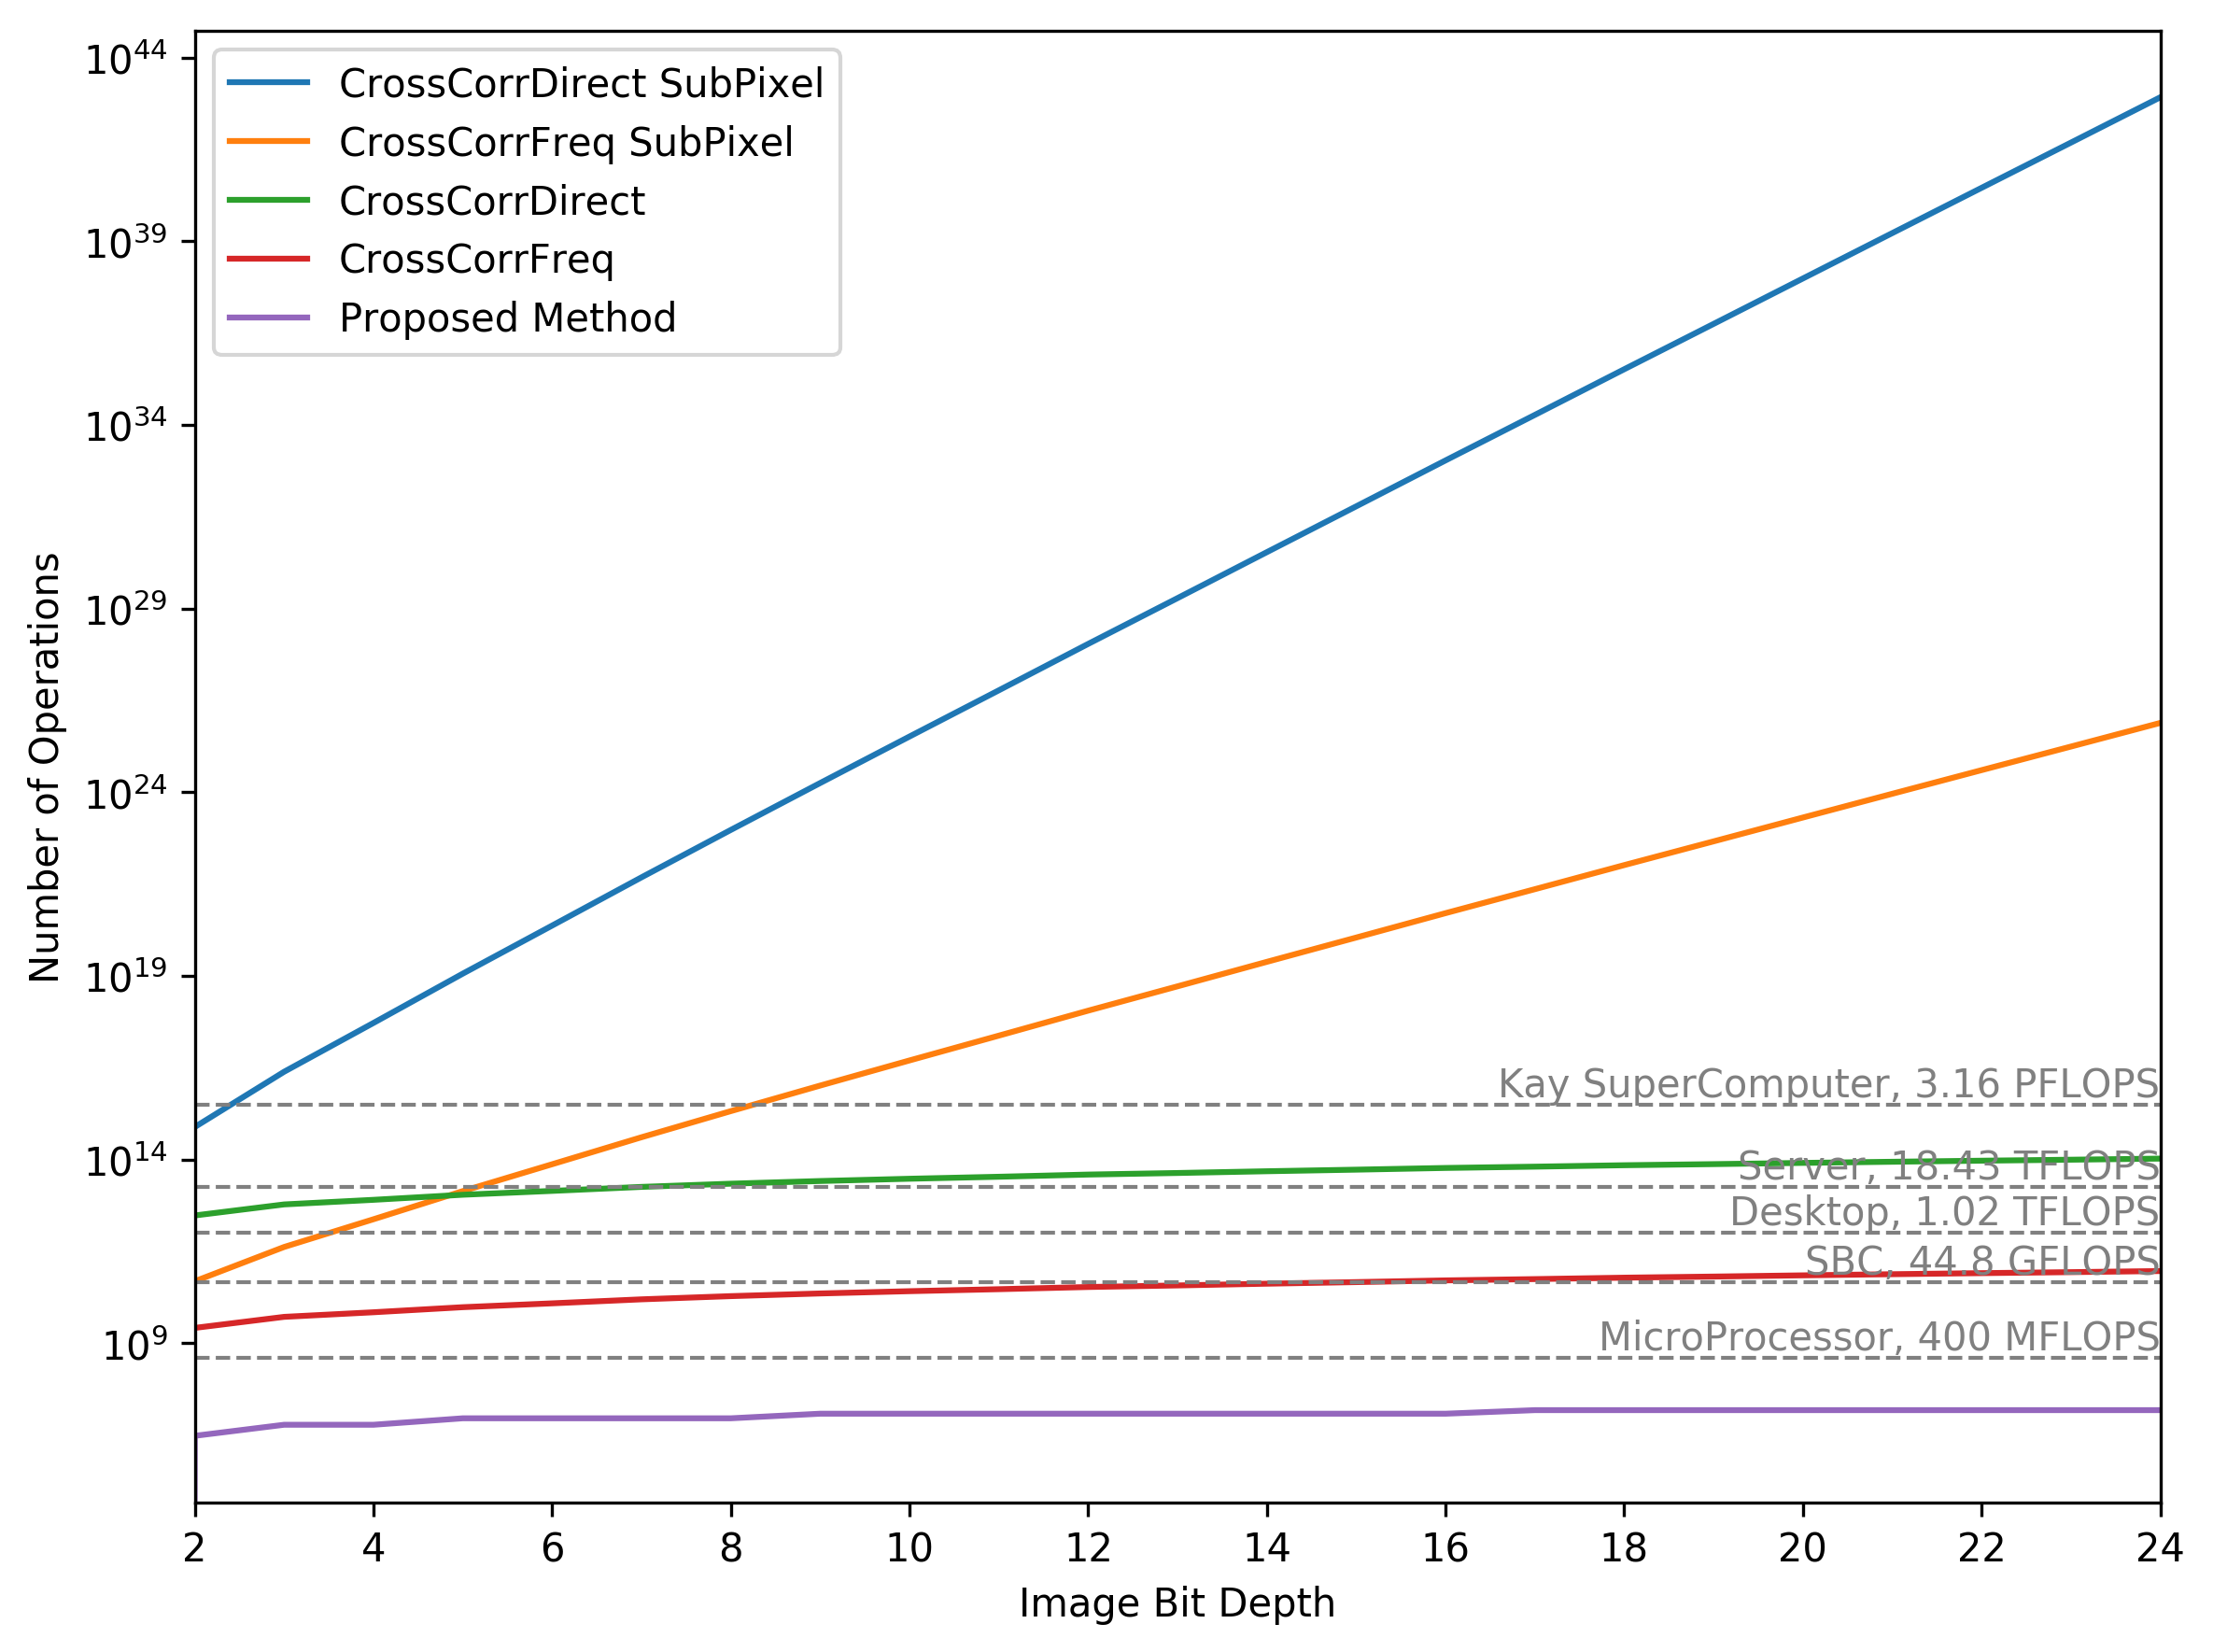

In [7]:
N = 1000

bits_min = 1
bits_max = 25
bits_step = 1
Bit_Depth = [b for b in range(bits_min,bits_max)]

MultAdd = True

ProposedMethod     = [ProposedMethod_Ops (N, bits=bits,           MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect    = [CrossCorrDirect_Ops(N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrFreq      = [CrossCorrFreq_Ops  (N, bits=bits, SS=False, MultAdd=MultAdd) for bits in Bit_Depth]
CrossCorrDirect_SS = [CrossCorrDirect_Ops(N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]
CrossCorrFreq_SS   = [CrossCorrFreq_Ops  (N, bits=bits, SS=True, MultAdd=MultAdd)  for bits in Bit_Depth]

fout = "Results/ComputationalExpense/"
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)

ax.plot(Bit_Depth, CrossCorrDirect_SS, label = "CrossCorrDirect SubPixel")
ax.plot(Bit_Depth, CrossCorrFreq_SS, label = "CrossCorrFreq SubPixel")
ax.plot(Bit_Depth, CrossCorrDirect, label = "CrossCorrDirect")
ax.plot(Bit_Depth, CrossCorrFreq, label = "CrossCorrFreq")
ax.plot(Bit_Depth, ProposedMethod, label = "Proposed Method")

ticks = range(0, bits_max, 2)
plt.xticks(ticks, ticks)

for index, system in ComputeSystems.iterrows():
    plt.axhline(y=system["FLOPS"], linestyle='--', linewidth = 1, color='grey')
    plt.text(bits_max-1, system["FLOPS"], "{}, {}FLOPS".format(system["Name"], hf.format_size(system["FLOPS"])[:-1]), ha='right', va='bottom', weight='light', color='grey')  

ax.set_yscale('log')

plt.xlim((bits_min+1, bits_max-1))
plt.ylabel('Number of Operations')
plt.xlabel('Image Bit Depth')
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(top=0.92) #give some extra room for the title, top of graph is at 92% of height of fig
#plt.title("Computational Expense of Motion Estimation, {}bit grayscale".format(bits), fontsize = 12)

plt.savefig(fout+"CompExp_vs_BitDepth_N{}_MA{}".format(N, MultAdd))
# plt.show()

In [8]:
print([(B,PM) for B,PM in zip (Bit_Depth, ProposedMethod)])

[(1, 0.0), (2, 3002000.0), (3, 6004000.0), (4, 6004000.0), (5, 9006000.0), (6, 9006000.0), (7, 9006000.0), (8, 9006000.0), (9, 12008000.0), (10, 12008000.0), (11, 12008000.0), (12, 12008000.0), (13, 12008000.0), (14, 12008000.0), (15, 12008000.0), (16, 12008000.0), (17, 15010000.0), (18, 15010000.0), (19, 15010000.0), (20, 15010000.0), (21, 15010000.0), (22, 15010000.0), (23, 15010000.0), (24, 15010000.0)]


# Storage Expense

In [9]:
def CrossCorrFreq_Mem(N,bits=8, SS=False, bytes=True):
    if SS: SS = 2**bits
    else: SS = 1
        
    if bytes:
        return np.ceil((bits*(3*((3*N*SS)**2)))/8)
    return bits*(3*((3*N*SS)**2))

def CrossCorrDirect_Mem(N,bits=8, SS=False, bytes=True):
    if SS: SS = 2**bits
    else: SS = 1

    if bytes:
        return np.ceil((bits*(3*((N*SS)**2)))/8)
    return bits*(3*((N*SS)**2))

def ProposedMethod_Mem(N,bits=8, bytes=True):
    if bytes:
        return np.ceil((bits*(3*(N**2)+(2*N)+2))/8)
    return bits*(3*(N**2)+(2*N)+2)

def compare_algs(px_x, px_y, bits = 8, SS = False, SILENT=False):
    N = np.sqrt(px_x*px_y)   
    speed_up = np.floor(CrossCorrFreq_Mem(N,bits,SS)/ProposedMethod_Mem(N,bits))
    if not SILENT:
        print("{:.0f} {:.0f} is equivalent to {:.0f}^2, {:.2e}x speedup ".format(px_x, px_y, N, speed_up))
    return speed_up

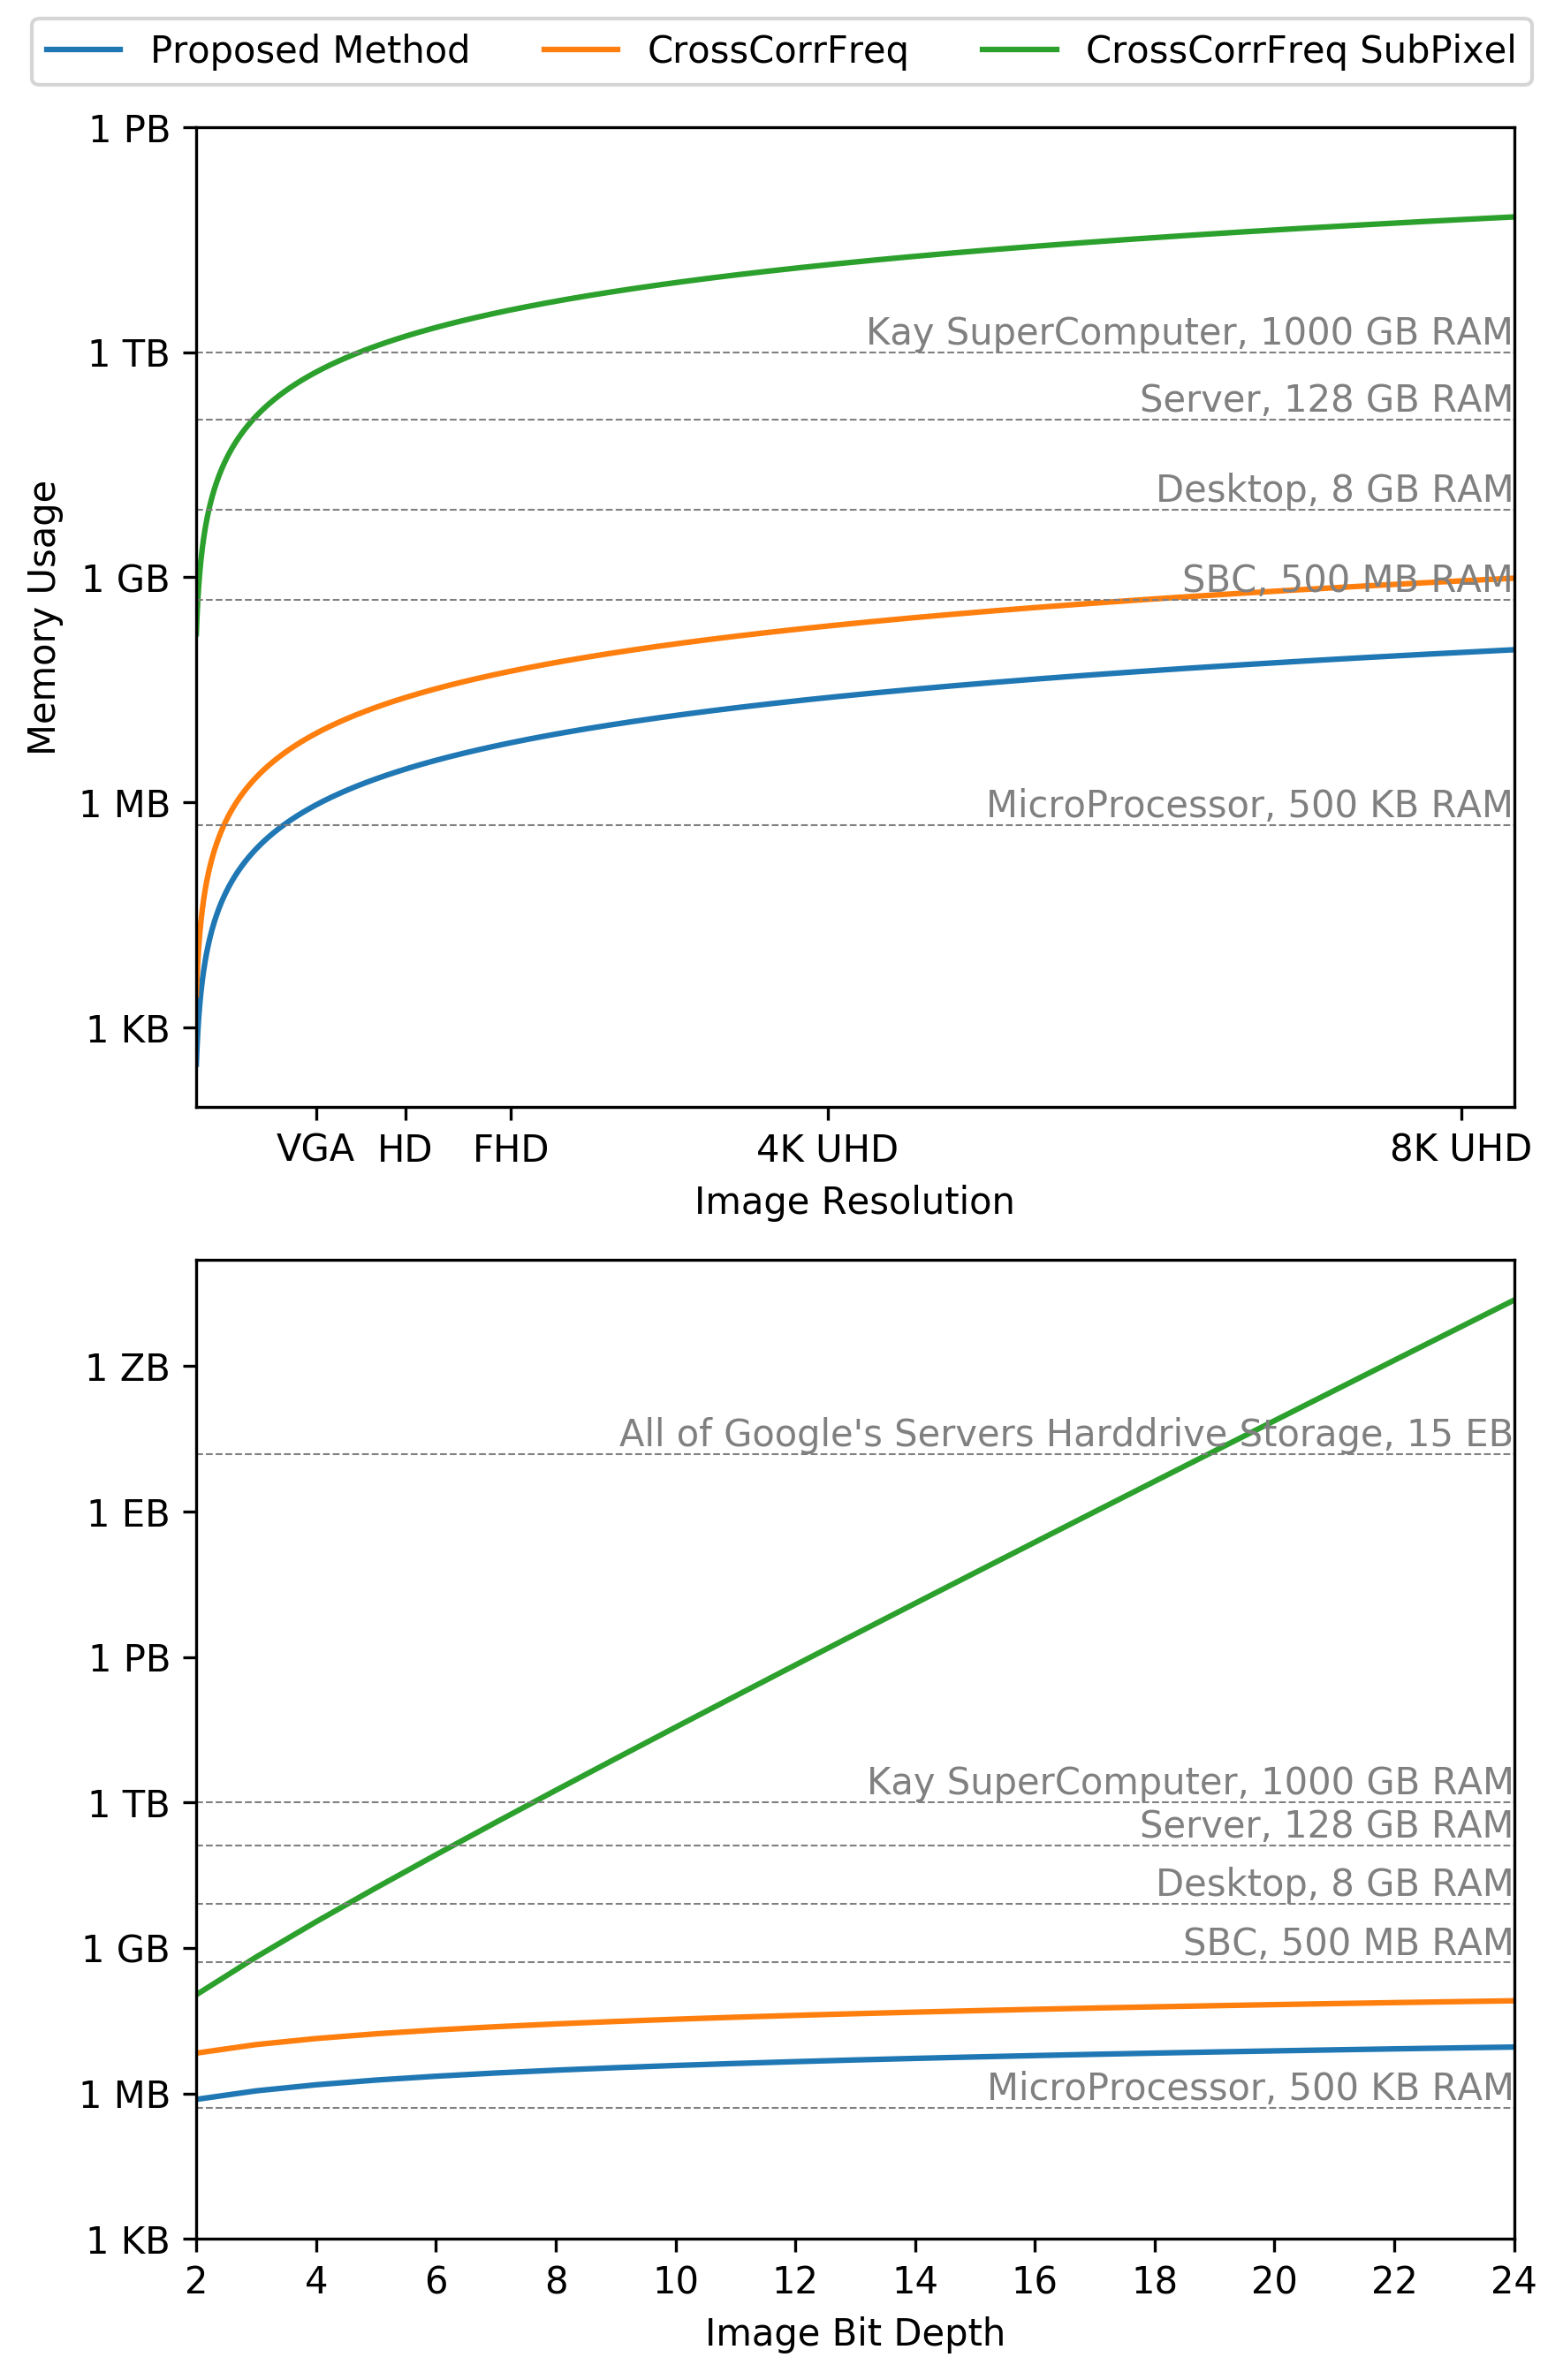

In [31]:
fout = "Results/ComputationalExpense/"

#------------------------------------------------------------------------------------------------------------
# Graph 1
#------------------------------------------------------------------------------------------------------------

N_min = 10
N_max = 6000
N_range = [N for N in range(N_min,N_max)]

bits = 8
MultAdd = False

ProposedMethod     = [ProposedMethod_Mem (N, bits=bits) for N in N_range]
CrossCorrDirect    = [CrossCorrDirect_Mem(N, bits=bits, SS=False) for N in N_range]
CrossCorrFreq      = [CrossCorrFreq_Mem  (N, bits=bits, SS=False) for N in N_range]
CrossCorrDirect_SS = [CrossCorrDirect_Mem(N, bits=bits, SS=True)  for N in N_range]
CrossCorrFreq_SS   = [CrossCorrFreq_Mem  (N, bits=bits, SS=True)  for N in N_range]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,9), dpi=300)

l1 = ax1.plot(N_range, ProposedMethod)
l2 = ax1.plot(N_range, CrossCorrFreq)
#l3 = ax1.plot(N_range, CrossCorrDirect)
l3 = ax1.plot(N_range, CrossCorrFreq_SS)
#l5 = ax1.plot(N_range, CrossCorrDirect_SS)

## AXES
    
ax1.set_yscale('log')
ax1.set_xlim((N_min, N_max))
ax1.set_ylabel('Memory Usage')
ax1.set_xlabel('Image Resolution')

## TICKS

Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
N_sq = [np.sqrt(px*py) for px,py in Resolutions]
x_val = N_sq
ticks = ["VGA", "HD", "FHD", "4K UHD", "8K UHD"]
ax1.set_xticks(x_val)
ax1.set_xticklabels(ticks)

y_val = [(10**(3*(i+1))) for i in range(5)]
y_tick = [hf.format_size(val) for val in y_val]
ax1.set_yticks(y_val)
ax1.set_yticklabels(y_tick)

## ANNOTATION

for index, system in ComputeSystems.iterrows():
    ax1.axhline(y=system["RAM"], linestyle='--', linewidth = 0.5, color='grey')
    ax1.text(N_max-1, system["RAM"], "{}, {} RAM".format(system["Name"], hf.format_size(system["RAM"])), ha='right', va='bottom', weight='light', color='grey')  

#------------------------------------------------------------------------------------------------------------
# Graph 2
#------------------------------------------------------------------------------------------------------------

N = 1000

bits_min = 1
bits_max = 25
bits_step = 1
Bit_Depth = [b for b in range(bits_min,bits_max)]

ProposedMethod     = [ProposedMethod_Mem (N, bits=b) for b in Bit_Depth]
CrossCorrDirect    = [CrossCorrDirect_Mem(N, bits=b, SS=False) for b in Bit_Depth]
CrossCorrFreq      = [CrossCorrFreq_Mem  (N, bits=b, SS=False) for b in Bit_Depth]
CrossCorrDirect_SS = [CrossCorrDirect_Mem(N, bits=b, SS=True) for b in Bit_Depth]
CrossCorrFreq_SS   = [CrossCorrFreq_Mem  (N, bits=b, SS=True) for b in Bit_Depth]

## PLOT

ax2.plot(Bit_Depth, ProposedMethod)
ax2.plot(Bit_Depth, CrossCorrFreq)
#ax2.plot(Bit_Depth, CrossCorrDirect)
ax2.plot(Bit_Depth, CrossCorrFreq_SS)
#ax2.plot(Bit_Depth, CrossCorrDirect_SS)

## AXES

ax2.set_yscale('log')
ax2.set_xlim((bits_min+1, bits_max-1))
ax2.set_xlabel('Image Bit Depth')

## TICKS

ticks = range(2, bits_max, 2)
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks)

y_val = [(10**(3*(i+1))) for i in range(7)]
y_tick = [hf.format_size(val) for val in y_val]
ax2.set_yticks(y_val)
ax2.set_yticklabels(y_tick)

## ANNOTATION

for index, system in ComputeSystems.iterrows():
    ax2.axhline(y=system["RAM"], linestyle='--', linewidth = 0.5, color='grey')
    ax2.text(bits_max-1, system["RAM"], "{}, {} RAM".format(system["Name"], hf.format_size(system["RAM"])), ha='right', va='bottom', weight='light', color='grey')

text, y = ("All of Google's Servers Harddrive Storage", 15*(10**18))
ax2.axhline(y=y, linestyle='--', linewidth = 0.5, color='grey')
ax2.text(bits_max-1, y, "{}, {}".format(text, hf.format_size(y)), ha='right', va='bottom', weight='light', color='grey')
    
## FINAL DETAILS

#line_labels = ('Proposed Method', 'CrossCorrFreq', 'CrossCorrFreq SubPixel', 'CrossCorrDirect', 'CrossCorrDirect SubPixel')
line_labels = ('Proposed Method', 'CrossCorrFreq', 'CrossCorrFreq SubPixel')
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper center",   # Position of legend
           ncol=3)

plt.tight_layout()
plt.subplots_adjust(top=0.95) #give some extra room for the legend
plt.savefig(fout+"StorExp.png")
plt.show()

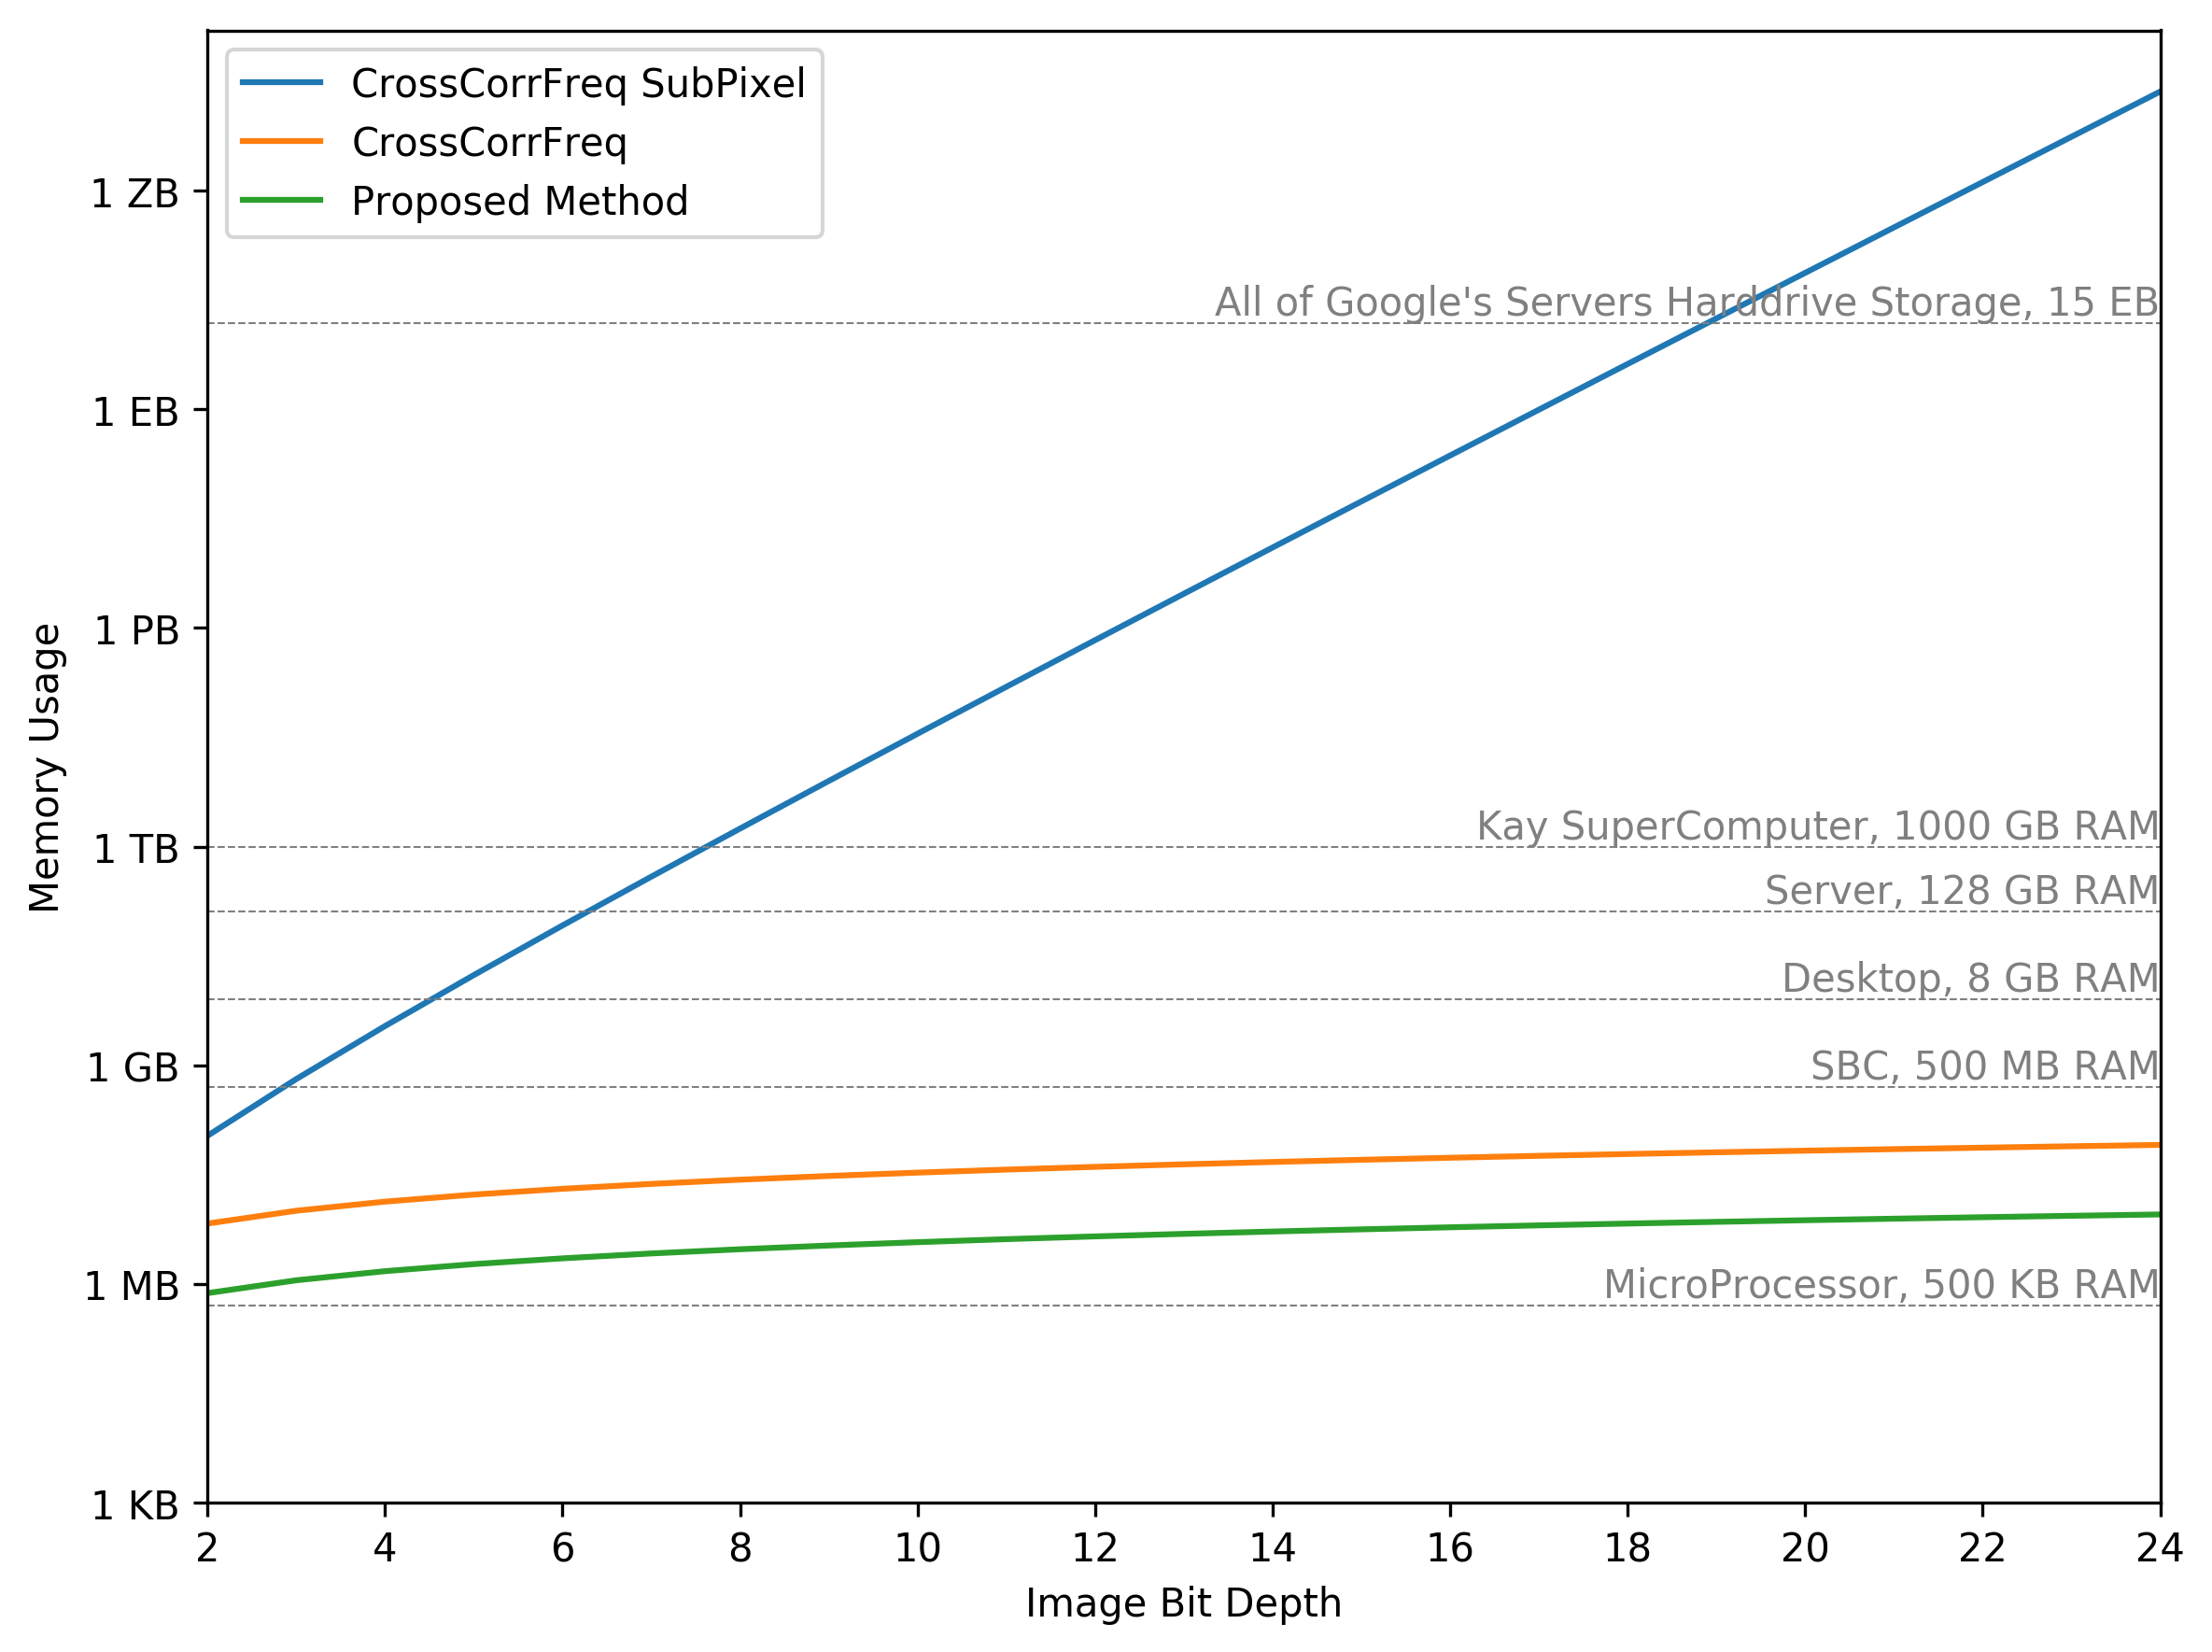

In [11]:
N = 1000

bits_min = 1
bits_max = 25
bits_step = 1
Bit_Depth = [b for b in range(bits_min,bits_max)]

ProposedMethod     = [ProposedMethod_Mem (N, bits=b) for b in Bit_Depth]
CrossCorrDirect    = [CrossCorrDirect_Mem(N, bits=b, SS=False) for b in Bit_Depth]
CrossCorrFreq      = [CrossCorrFreq_Mem  (N, bits=b, SS=False) for b in Bit_Depth]
CrossCorrDirect_SS = [CrossCorrDirect_Mem(N, bits=b, SS=True) for b in Bit_Depth]
CrossCorrFreq_SS   = [CrossCorrFreq_Mem  (N, bits=b, SS=True) for b in Bit_Depth]

fout = "Results/ComputationalExpense/"
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)

ax.plot(Bit_Depth, CrossCorrFreq_SS, label = "CrossCorrFreq SubPixel")
ax.plot(Bit_Depth, CrossCorrFreq, label = "CrossCorrFreq")
#ax.plot(Bit_Depth, CrossCorrDirect, label = "CrossCorrDirect")
#ax.plot(Bit_Depth, CrossCorrDirect_SS, label = "CrossCorrDirect SubPixel")
ax.plot(Bit_Depth, ProposedMethod, label = "Proposed Method")


ticks = range(0, bits_max, 2)
plt.xticks(ticks, ticks)

ax.set_yscale('log')
y_val = [(10**(3*(i+1))) for i in range(7)]
y_tick = [hf.format_size(val) for val in y_val]
#["1 KiloByte", "1 MegaByte", "1 GigaByte", "1 TeraByte", "1 PetaByte", "1 ExaByte", "1 ZettaByte" ]
plt.yticks(y_val, y_tick)

for index, system in ComputeSystems.iterrows():
    plt.axhline(y=system["RAM"], linestyle='--', linewidth = 0.5, color='grey')
    plt.text(bits_max-1, system["RAM"], "{}, {} RAM".format(system["Name"], hf.format_size(system["RAM"])), ha='right', va='bottom', weight='light', color='grey')

text, y = ("All of Google's Servers Harddrive Storage", 15*(10**18))
plt.axhline(y=y, linestyle='--', linewidth = 0.5, color='grey')
plt.text(bits_max-1, y, "{}, {}".format(text, hf.format_size(y)), ha='right', va='bottom', weight='light', color='grey')
    
    
plt.xlim((bits_min+1, bits_max-1))
plt.ylabel('Memory Usage')
plt.xlabel('Image Bit Depth')
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(top=0.92) #give some extra room for the title, top of graph is at 92% of height of fig
#plt.title("Computational Expense of Motion Estimation, {}bit grayscale".format(bits), fontsize = 12)

plt.savefig(fout+"StorExp_vs_BitDepth_N{}_sq".format(N))
plt.show()

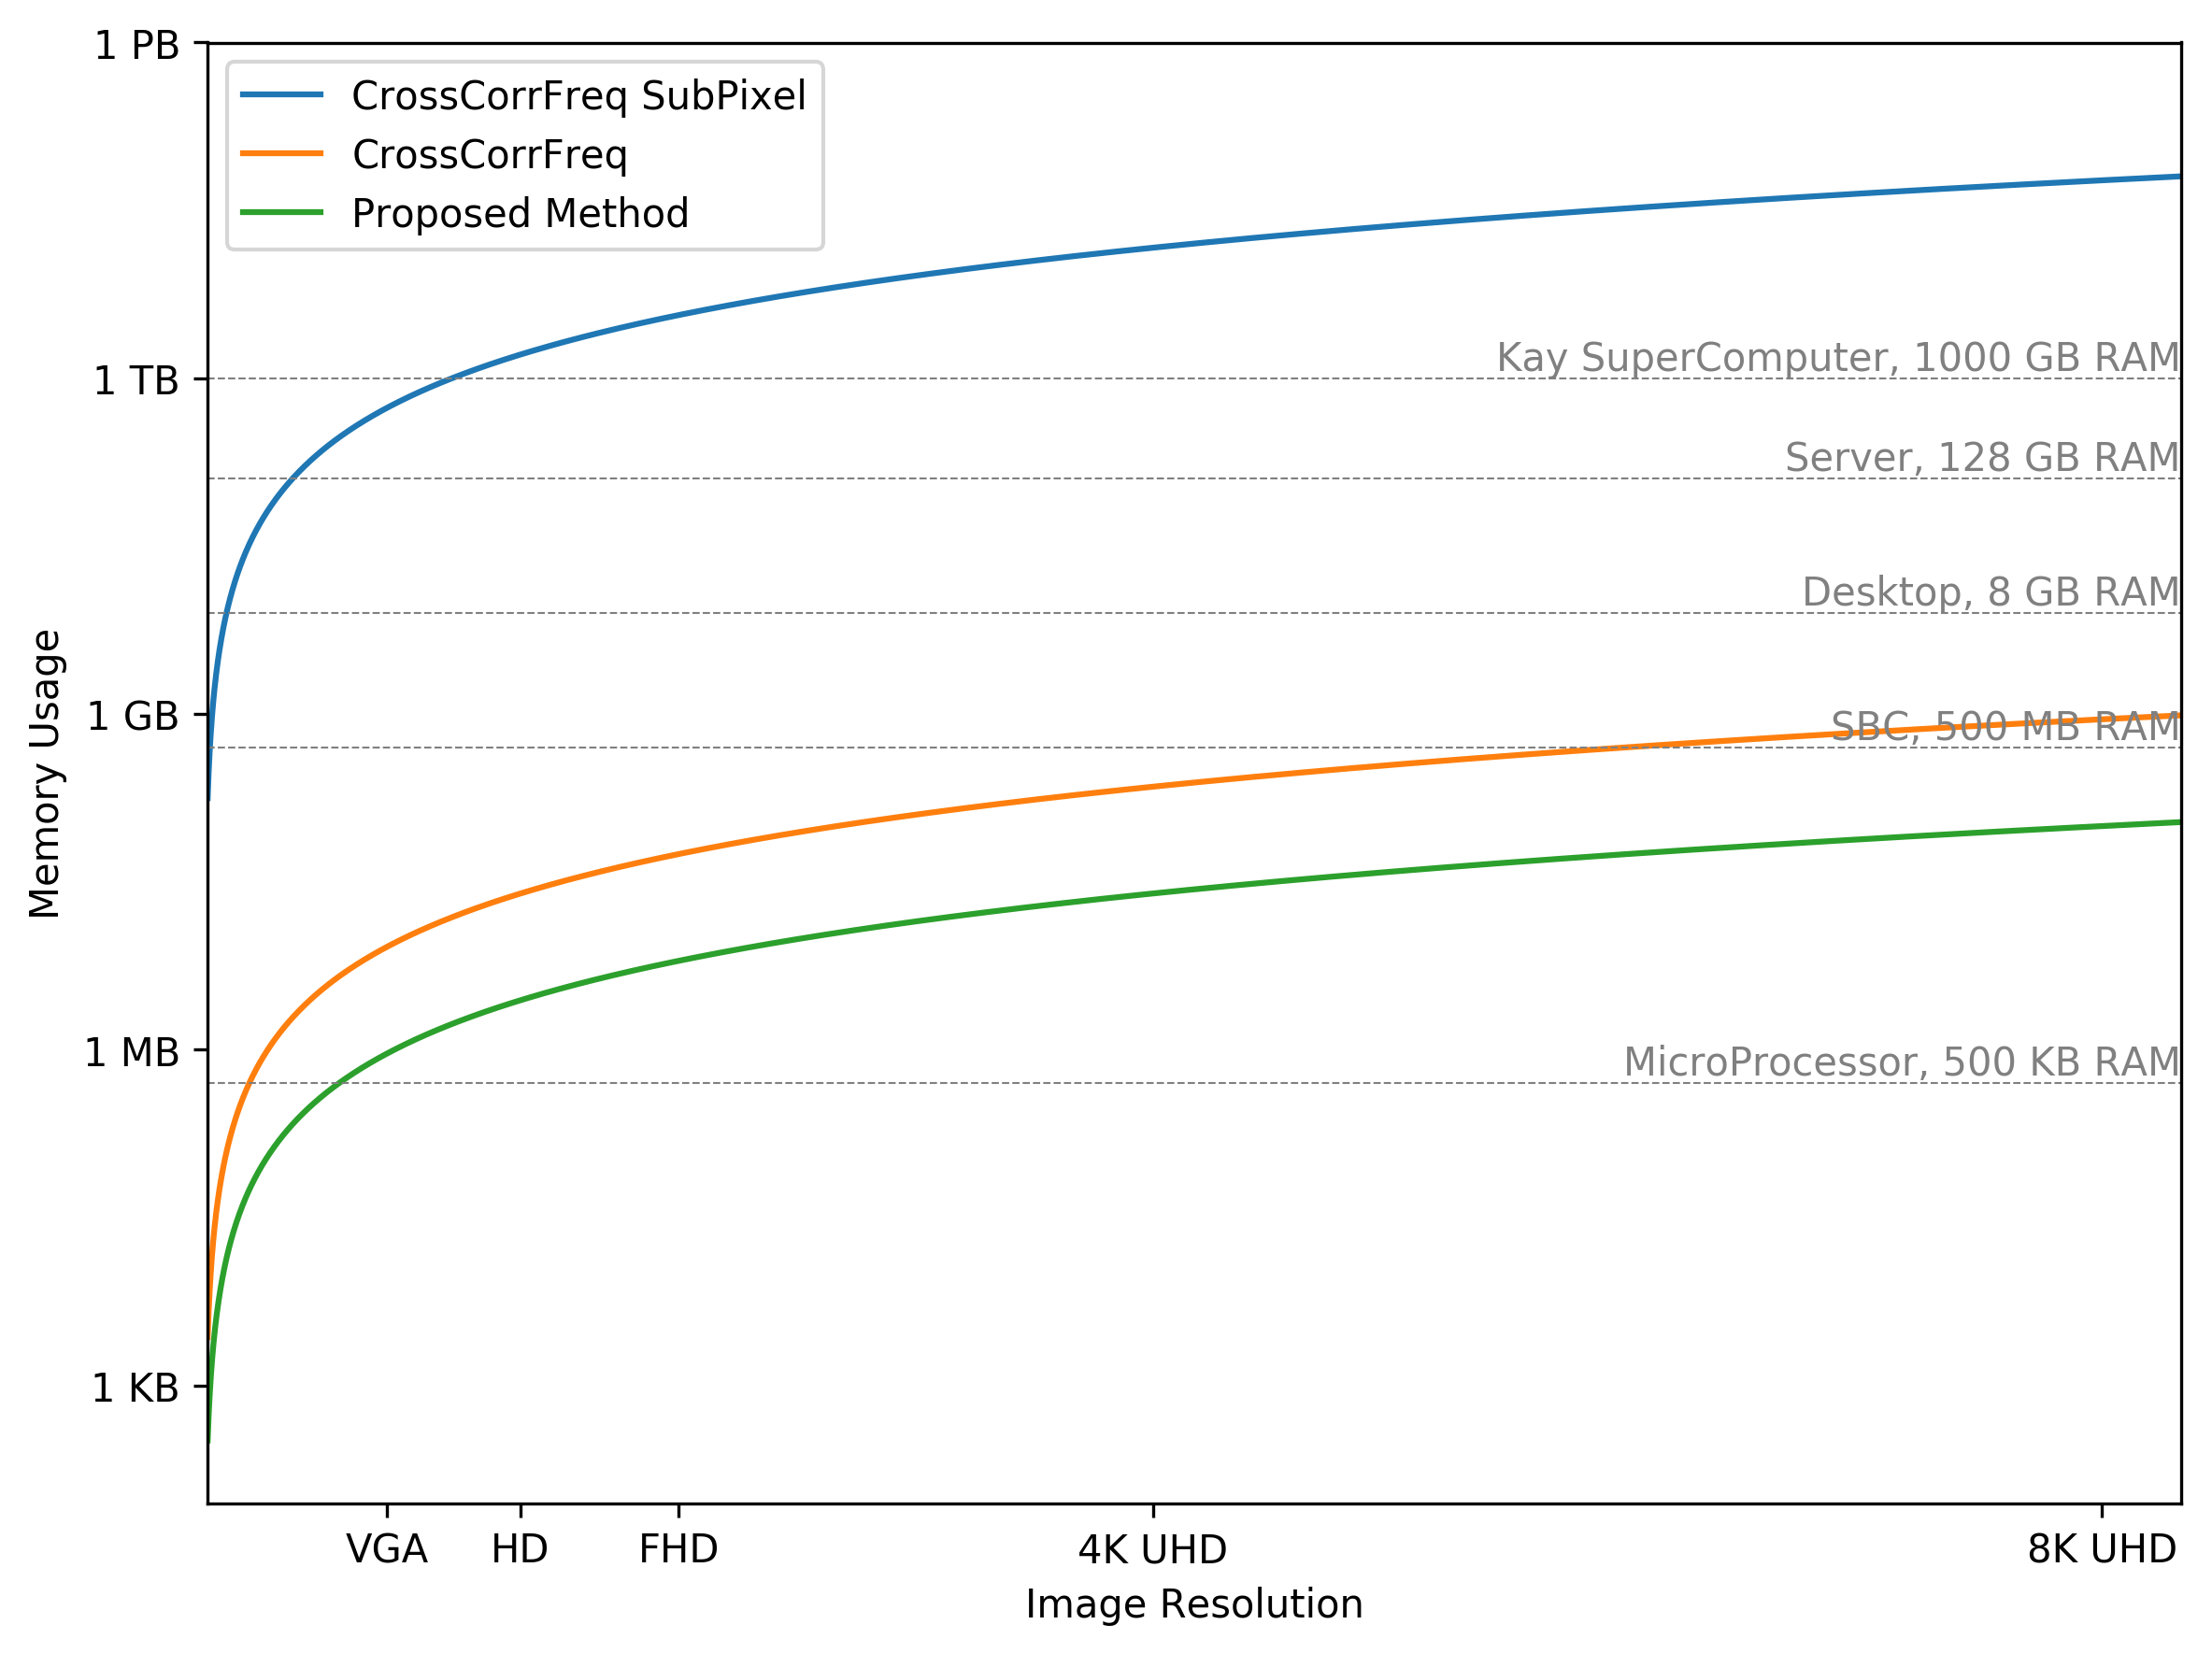

In [12]:
N_min = 10
N_max = 6000
N_range = [N for N in range(N_min,N_max)]

bits = 8

ProposedMethod     = [ProposedMethod_Mem (N, bits=bits) for N in N_range]
#CrossCorrDirect    = [CrossCorrDirect_Mem(N, bits=bits, SS=False) for N in N_range]
CrossCorrFreq      = [CrossCorrFreq_Mem  (N, bits=bits, SS=False) for N in N_range]
#CrossCorrDirect_SS = [CrossCorrDirect_Mem(N, bits=bits, SS=True)  for N in N_range]
CrossCorrFreq_SS   = [CrossCorrFreq_Mem  (N, bits=bits, SS=True)  for N in N_range]

fout = "Results/ComputationalExpense/"
fig = plt.figure(figsize=(8,6), dpi=300)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = fig.add_subplot(111)

ax.plot(N_range, CrossCorrFreq_SS, label = "CrossCorrFreq SubPixel")
#ax.plot(N_range, CrossCorrDirect_SS, label = "CrossCorrDirect w/SS")
ax.plot(N_range, CrossCorrFreq, label = "CrossCorrFreq")
#ax.plot(N_range, CrossCorrDirect, label = "CrossCorrDirect")
ax.plot(N_range, ProposedMethod, label = "Proposed Method")

Resolutions = np.array([(640,480), (1280, 720), (1920,1080), (3840,2160), (7680,4320)])
N_sq = [np.sqrt(px*py) for px,py in Resolutions]
x_val = N_sq
tick = ["VGA", "HD", "FHD", "4K UHD", "8K UHD"]
plt.xticks(x_val, tick)

ax.set_yscale('log')
y_val = [(10**(3*(i+1))) for i in range(5)]
#y_tick = ["1 KiloByte", "1 MegaByte", "1 GigaByte", "1 TeraByte", "1 PetaByte"]
y_tick = [hf.format_size(val) for val in y_val]
plt.yticks(y_val, y_tick)

for index, system in ComputeSystems.iterrows():
    plt.axhline(y=system["RAM"], linestyle='--', linewidth = 0.5, color='grey')
    plt.text(N_max-1, system["RAM"], "{}, {} RAM".format(system["Name"], hf.format_size(system["RAM"])), ha='right', va='bottom', weight='light', color='grey')  

plt.xlim((N_min, N_max))
plt.ylabel('Memory Usage')
plt.xlabel('Image Resolution')
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(top=0.92) #give some extra room for the title, top of graph is at 92% of height of fig
#plt.title("Computational Expense of Motion Estimation, {}bit grayscale".format(bits), fontsize = 12)

plt.savefig(fout+"StorExp_vs_ImSize_b{}".format(bits))
plt.show()

# Realworld Testing

In [13]:
import timeit

images_fn = (
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951-250-P280.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_500-P550.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_650-P700.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_900-P960.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_1100-P1200.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_1400-P1440.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_1000-P1500.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_2800-P2880.jpg",
    "/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951_5700-P5760.jpg",
)


mycode = '''RowTot, ColTot, EC = ProposedMethod(original_image, original_image, ErrorCheck=True)'''

timing_results = list()
iters = 100

for image_fn in images_fn:
    mysetup = '''from Proposed_Method import ProposedMethod;
from SubPixelTranslate import importImage
original_image = importImage('{}')'''.format(image_fn)
    
    timing_results.append((image_fn[-6:], timeit.timeit(setup = mysetup, stmt = mycode, number = iters) /iters))
    

Unable to load image, Exception: [Errno 2] No such file or directory: '/home/james/GoogleDrive/College/Thesis/TestImages/PADDED/USAF-1951-250-P280.jpg'


SystemExit: 

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3299: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import json
a = {'a':1,'b':2,'c':3}
with open("your_json_file", "w") as fp:
    json.dump(a , fp) 
with open("your_json_file", "r") as fp:
    a = json.load(fp) # load back the original dictionary

In [ ]:
print(*timing_results, sep = "\n")

import json

outputfilename = "Execution_TestResults.json"
with open(outputfilename, 'wb') as outfile:
    json.dump(timing_results, outfile)

print("-"*60)
    
data  = json.loads(array)
print(*timing_results, sep = "\n")

In [ ]:
plt.plot(list(zip(*timing_results))[1], 'ro')
plt.show()